<a href="https://colab.research.google.com/github/SABBIRAHAMMED3/ML/blob/main/Course%202%20-%20Part%208%20-%20Lesson%202%20-%20Notebook%20(RockPaperScissors).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps.zip \
    -O /tmp/rps.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2025-05-10 17:25:55--  https://storage.googleapis.com/learning-datasets/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.207, 74.125.143.207, 173.194.69.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  38.0MB/s    in 6.0s    

2025-05-10 17:26:02 (31.7 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2025-05-10 17:26:02--  https://storage.googleapis.com/learning-datasets/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.207, 74.125.143.207, 173.194.69.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/rps-

In [4]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [5]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock03-102.png', 'rock04-044.png', 'rock01-037.png', 'rock07-k03-028.png', 'rock05ck01-033.png', 'rock07-k03-044.png', 'rock07-k03-090.png', 'rock05ck01-118.png', 'rock04-000.png', 'rock03-067.png']
['paper07-105.png', 'paper07-063.png', 'paper04-082.png', 'paper01-062.png', 'paper07-088.png', 'paper03-015.png', 'paper01-111.png', 'paper06-087.png', 'paper01-108.png', 'paper01-044.png']
['testscissors01-073.png', 'scissors02-102.png', 'scissors01-058.png', 'testscissors02-082.png', 'testscissors03-092.png', 'testscissors02-087.png', 'scissors04-077.png', 'scissors01-031.png', 'testscissors03-093.png', 'scissors04-083.png']


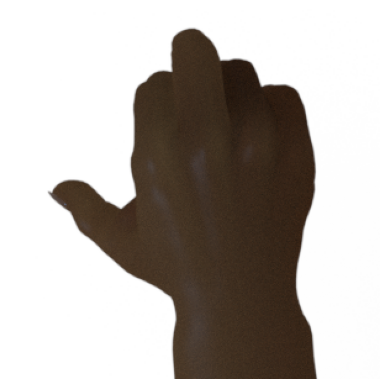

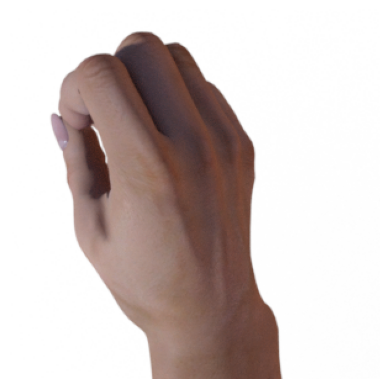

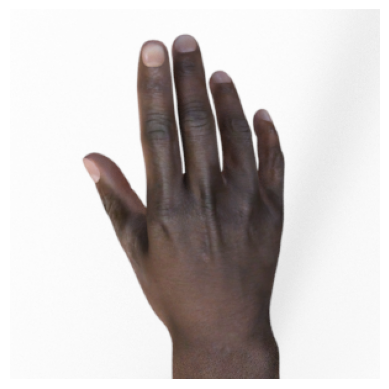

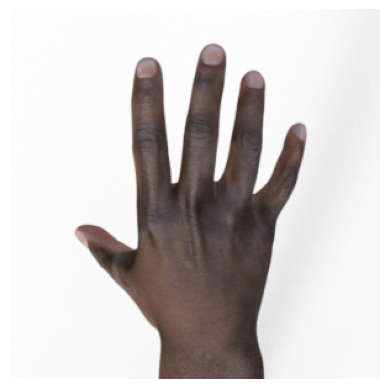

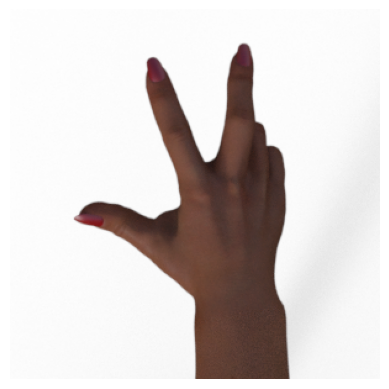

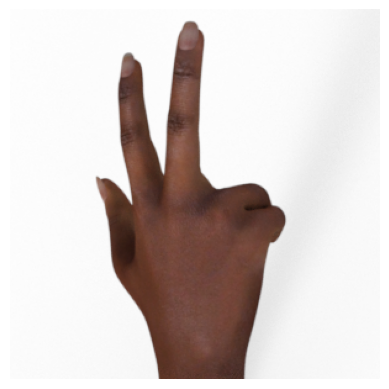

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [9]:
import tensorflow as tf
!pip install keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00
Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,473,475 (13.25 MB)

 Trainable params: 3,473,475 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.3431 - loss: 1.1830 - val_accuracy: 0.4892 - val_loss: 1.0937
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.4356 - loss: 1.1310 - val_accuracy: 0.4167 - val_loss: 1.0460
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.4234 - loss: 1.0754 - val_accuracy: 0.4704 - val_loss: 0.9581
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.4575 - loss: 1.0237 - val_accuracy: 0.6344 - val_loss: 0.9446
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5253 - loss: 0.9712 - val_accuracy: 0.7554 - val_loss: 0.6313
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5520 - loss: 1.0307 - val_accuracy: 0.5645 - val_loss: 0.9411
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6319 - loss: 0.7927 - val_accuracy: 0.9086 - val_loss: 0.4683
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7277 - loss: 0.6947 - val_accuracy: 0.9032 - val_loss:

In [1]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

NameError: name 'history' is not defined

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Hydrograph saved to synthetic_hydrograph.xlsx


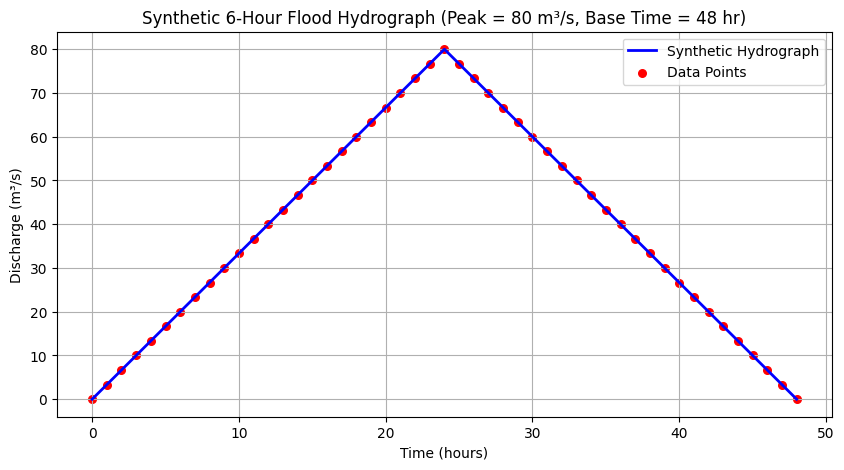

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_hydrograph(peak_discharge=80, base_time=48, time_step=1):
    """
    Generate a synthetic flood hydrograph with a triangular shape.

    Args:
        peak_discharge (float): Peak discharge in m³/s (default: 80).
        base_time (int): Total duration of the hydrograph in hours (default: 48).
        time_step (int): Time interval in hours (default: 1).

    Returns:
        pandas.DataFrame: Time and discharge values.
    """
    # Time array (hours)
    time = np.arange(0, base_time + time_step, time_step)

    # Discharge array (triangular shape)
    discharge = np.zeros_like(time, dtype=float)

    # Rising limb (linear increase to peak)
    peak_time = base_time / 2
    rising_limb = time <= peak_time
    discharge[rising_limb] = (peak_discharge / peak_time) * time[rising_limb]

    # Falling limb (linear decrease from peak)
    falling_limb = time > peak_time
    discharge[falling_limb] = peak_discharge - (peak_discharge / (base_time - peak_time)) * (time[falling_limb] - peak_time)

    # Create DataFrame
    df = pd.DataFrame({
        'Time (hr)': time,
        'Discharge (m³/s)': discharge
    })

    return df

# --- Generate hydrograph (adjust parameters as needed) ---
hydrograph = generate_hydrograph(peak_discharge=80, base_time=48, time_step=1)

# --- Save to Excel ---
output_file = "synthetic_hydrograph.xlsx"
hydrograph.to_excel(output_file, index=False)
print(f"Hydrograph saved to {output_file}")

# --- Plot the hydrograph ---
plt.figure(figsize=(10, 5))
plt.plot(hydrograph['Time (hr)'], hydrograph['Discharge (m³/s)'], 'b-', linewidth=2, label='Synthetic Hydrograph')
plt.scatter(hydrograph['Time (hr)'], hydrograph['Discharge (m³/s)'], color='red', s=30, label='Data Points')
plt.xlabel('Time (hours)')
plt.ylabel('Discharge (m³/s)')
plt.title('Synthetic 6-Hour Flood Hydrograph (Peak = 80 m³/s, Base Time = 48 hr)')
plt.grid(True)
plt.legend()
plt.show()

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

In [2]:
def build_flood_routing_dnn(input_dim=193, output_dim=193, hidden_units=500, hidden_layers=100, dropout_rate=0.2):
    model = Sequential()

    # Input layer
    model.add(Dense(hidden_units, input_dim=input_dim, activation='relu'))

    # Hidden layers
    for _ in range(hidden_layers - 1):
        model.add(Dense(hidden_units, activation='relu'))
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(output_dim))

    # Compile
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

In [3]:
import pandas as pd
x= pd.read_csv('/content/Inflow.csv')
x.shape

(193, 10)

In [4]:
y= pd.read_csv('/content/Inflow.csv')
y.shape

(193, 10)

In [5]:
x.head()

,inflow01,inflow02,inflow03,inflow04,inflow05,inflow06,inflow07,inflow08,inflow09,inflow10
0,100.0,150.00,100.0,200.00,100.00,100.00,150.0,200.00,150.00,200.00
1,462.5,268.75,120.0,206.25,103.33,105.56,162.5,205.88,153.33,216.67
2,825.0,387.50,140.0,212.50,106.67,111.11,175.0,211.76,156.67,233.33
3,1187.5,506.25,160.0,218.75,110.00,116.67,187.5,217.65,160.00,250.00
4,1550.0,625.00,180.0,225.00,113.33,122.22,200.0,223.53,163.33,258.33


In [6]:
x=x.values.reshape(193,10)
y=y.values.reshape(193,10)

In [7]:
x

array([[100.  , 150.  , 100.  , ..., 200.  , 150.  , 200.  ],
       [462.5 , 268.75, 120.  , ..., 205.88, 153.33, 216.67],
       [825.  , 387.5 , 140.  , ..., 211.76, 156.67, 233.33],
       ...,
       [100.  , 100.  , 100.  , ..., 283.33, 111.25, 160.11],
       [100.  , 100.  , 100.  , ..., 266.67, 110.  , 158.99],
       [100.  , 100.  , 100.  , ..., 250.  , 108.75, 157.86]])

In [8]:
# Normalize
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(x)
y_scaled = scaler_y.fit_transform(y)

In [9]:
X_scaled.shape

(193, 10)

In [10]:
X_scaled=X_scaled.transpose()
y_scaled=y_scaled.transpose()

In [12]:
X_scaled.shape

(10, 193)

In [11]:
# Build the model
model = build_flood_routing_dnn()

# Train the model
history = model.fit(X_scaled, y_scaled, epochs=200, batch_size=64, validation_split=0.2, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 88s 88s/step - loss: 0.1996 - mae: 0.3160 - val_loss: 0.2265 - val_mae: 0.3544
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step - loss: 0.1982 - mae: 0.3148 - val_loss: 0.2235 - val_mae: 0.3510
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 0.1958 - mae: 0.3127 - val_loss: 0.2182 - val_mae: 0.3448
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - loss: 0.1915 - mae: 0.3087 - val_loss: 0.2069 - val_mae: 0.3324
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 0.1816 - mae: 0.3007 - val_loss: 0.1791 - val_mae: 0.3063
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - loss: 0.1579 - mae: 0.2815 - val_loss: 0.1151 - val_mae: 0.2566
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - loss: 0.1213 - mae: 0.2702 - val_loss: 0.1980 - val_mae: 0.3698
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - loss: 0.4079 - mae: 0.5238 - val_loss: 0.0948 - val_mae: 0.2370
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 0.1105 

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 500)            │        97,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 500)            │             

 Total params: 74,979,581 (286.02 MB)

 Trainable params: 24,993,193 (95.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 49,986,388 (190.68 MB)

In [14]:
# Evaluate the model
loss, mae = model.evaluate(X_scaled, y_scaled)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# Predict
y_pred_scaled = model.predict(X_scaled)

#transpose

y_pred_scaled=y_pred_scaled.transpose()

# Inverse transform predictions
y_pred = scaler_y.inverse_transform(y_pred_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0781 - mae: 0.2335   
Test Loss: 0.0781, Test MAE: 0.2335
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


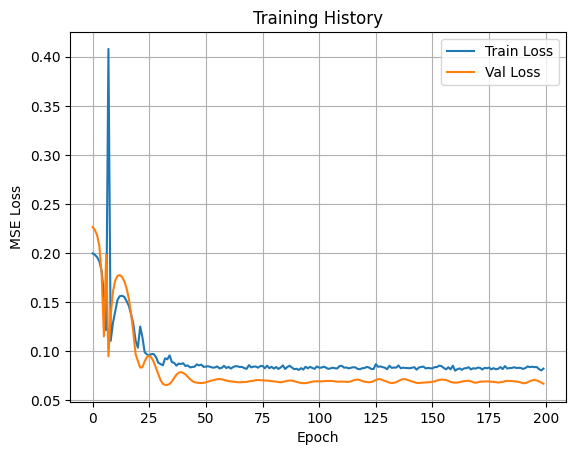

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training History')
plt.grid(True)
plt.show()

In [33]:
X_scaled.shape


(10, 193)

In [38]:
Y_predicted_scaled=model.predict(X_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [39]:
Y_predicted_scaled=Y_predicted_scaled.transpose()

In [40]:
Y_pred = scaler_y.inverse_transform(Y_predicted_scaled)

In [45]:
Y_pred=pd.DataFrame(Y_pred)
Y_pred.to_excel('predicted_values.xlsx')